#### Computational Modeling of Cognition and Behavior

# 2 From Words to Models
## Building a Toolkit

***

## 2.1 Response Times in Speeded-Choice Tasks

***

<br>

"Choice rection time" task (Smith and Vickers 1998)

<br>

Can be approached using a "random walk model":

<br>

Simple model assumptions:

- Evidence for a decision is built up gradually.

- Evidence is sampled at discrete time steps.

- Sampling starts with 0 evidence


How the model works:

- Magnitude of discrete nudges towards a decision reflects the information available at a single sample.

- Sampled evidence is summed accross time steps until a response threshold is reached.

- Sampling starts with 0 evidence and moves towards one of two thresholds, each representing a choice (left/righ for example).

Some conclusions:

- If the two thresholds are equidistant from 0, the reponse times should be equal.


Prediction of the model:

- Response time is dependent on evidence 

<br>

## 2.1 Response Times in Speeded-Choice Tasks

***
<br>

### 2.2.1 Getting started

<br>

### 2.2.2 The Random-Walk Model

<br>

First, a function is created to simulate a single trial, it takes the decision variable drift for a single trial and a threshold as it's inputs.

<br>


In [2]:
import numpy as np


def random_walk_trial(acc_drift_row, threshold):
    """ Single trial for a random walk model of decision making.

    Parameters
    ----------
    acc_drift_row : numpy.ndarray
        A single row numpy array, containing a cumulative sum of random 
        increments.

    threshold : float
        The value of evidence at which a decision is made.

    Returns
    -------
    acc_drift_row : numpy.ndarray
        A single row numpy array, containing a cumulative sum of random 
        increments. Once a value reaches the threshold the trial is over
        and following values are set to NaN.

    trial_latency : int
        The index which a decision is made (the evidence crosses a 
        threshold). -1 if no decision is made.

    trial_response : int
        + 1 for decision made for upper threshold, -1 when decision made 
        for negative threshold, 0 for no decision made.
    """
    try:
        # look for the first index when the threshold is crossed
        trial_latency = np.where(np.abs(acc_drift_row) >= threshold)[0][0]
    # if the index is never crossed
    except IndexError:  
        trial_latency = -1  # no latency
    if trial_latency == -1:
        trial_response = 0  # no response
    # if the index is crossed
    else:
        trial_response = np.sign(acc_drift_row[trial_latency])
        # After the decision is made the trial ends
        acc_drift_row[trial_latency + 1:] = np.NaN
    return acc_drift_row, trial_latency, trial_response


<br>

Then, a function is created to generate evidence, with a row for every trial. A third function runs the random walk model on every trial. Two dataframes are output. 'df_trial_data' gives a trial per row, containing the trial response and trail latency (time taken to make a decision). The second dataframe 'df_dv' contains the decision variable (dv) for every time point (rows) for every trial (columns). 

<br>

**Note**: Model is not an evidence accumulator model! Evidence fixes the centre of a distribution of drift.


In [14]:
import pandas as pd

def gen_drift(evidence, sd_rw, nreps, nsamples):
    """Generate random drift, of a decision variable dependent on evidence
    
     Parameters
    ----------
    evidence : float
        The evidence given by the stimuli. The drift of the decision 
        variable is defined by increments drawn from a random normal 
        distribution with this mean value.
        
    sd_rw : float
        The drift of the decision variable is defined by increments 
        drawn from a random normal distribution with this standard 
        deviation.
        
    nreps : int
        The number of trials.

    nsamples : int
        The length of each trial.

    Returns
    -------
    acc_drift : numpy.ndarray
        A 2d numpy array representing the drift of the decision variable. 
        Each row is a trial and each column is a sample (time point).
        """
    start_zero_drift = np.zeros((nreps, 1))
    rand_norm_incr = np.random.normal(loc=evidence,
                                      scale=sd_rw,
                                      size=[nreps, nsamples])
    drift_incr = np.concatenate((start_zero_drift, rand_norm_incr),
                                   axis=1)
    acc_drift = drift_incr.cumsum(axis=1)
    return acc_drift

def random_walk(nreps, threshold, acc_drift):
    """Random walk model of decision making.
    
    Parameters
    ----------
    nreps : int
        The number of trials.
        
    threshold : float
        The value of evidence at which a decision is made.
              
    acc_drift : numpy.ndarray
        A numpy array representing the drift of the decision variable.

    Returns
    -------
    df_dv : pandas.core.frame.DataFrame
        A DataFrame containing a column per trial, row per time point.
        Data represents the decision variable (internal evidence).
        
    df_trial_data : pandas.core.frame.DataFrame
        A DataFrame containing two columns trial_latency and
         trial_response. Note that the length of columns is n_reps.
    
    """
    # run the random walk function on every row of drift
    dv, trial_latency, trial_response = zip(*[random_walk_trial(acc_drift_row, threshold)
                                              for acc_drift_row
                                              in acc_drift])
    column_names = ["trial_" + str(trial_n + 1) for trial_n in np.arange(nreps)]
    dv_array = np.asarray(dv).T
    df_dv = pd.DataFrame(data=dv_array,
                         columns=column_names)
    df_trial_data = pd.DataFrame(data={'trial_latency': trial_latency,
                                       'trial_response': trial_response})
    return df_dv, df_trial_data

<br>

Then I set some specific values to variables and run a simulation.

<br>


In [9]:
from IPython.display import display

nreps = 10000
nsamples = 300
evidence = 0    # the amount of evidence, 0 gives a random decision 
sd_rw = 0.3     # standard deviation of the random walk 
threshold = 3

acc_drift = gen_drift(evidence,
                      sd_rw,
                      nreps,
                      nsamples)
df_dv, df_trials = random_walk(nreps,
                               threshold,
                               acc_drift)

evidence = 0.3  # the amount of evidence, 0.3 gives a decision to the above boundry

acc_drift = gen_drift(evidence,
                      sd_rw,
                      nreps,
                      nsamples)
df_dv_above, df_trials_above = random_walk(nreps,
                                           threshold,
                                           acc_drift)

display(df_dv)
display(df_trials)

,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_7,trial_8,trial_9,trial_10,...,trial_9991,trial_9992,trial_9993,trial_9994,trial_9995,trial_9996,trial_9997,trial_9998,trial_9999,trial_10000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.019941,0.365473,-0.339723,-0.521077,0.041756,-0.021959,-0.280849,0.041664,-0.422888,0.590460,...,0.034936,0.210431,-0.350099,-0.228488,0.165530,-0.439158,-0.300952,-0.286595,0.312295,-0.091215
2,-0.474040,0.841148,-0.060389,-0.266943,-0.028572,-0.339375,-0.149572,0.052005,-0.240504,-0.140936,...,-0.281111,0.144364,-0.182965,0.358415,-0.216182,-0.466582,-0.125347,-0.209879,0.129374,-0.279422
3,-0.498509,0.576155,0.055300,-0.247704,-0.271900,0.110187,0.021393,1.229539,0.059598,-0.738412,...,-0.555800,-0.011779,-0.193246,0.477610,-0.448271,0.020028,-0.395979,-0.509481,0.323758,-0.371521
4,-0.825854,0.715202,-0.207103,-0.437584,-0.991594,0.020562,-0.399130,1.162442,0.190956,-0.449564,...,-0.679817,0.635098,-0.005487,0.654286,-0.769941,-0.402437,-0.794160,-0.539822,0.642996,-0.384327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2.334531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,2.069931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,1.892816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,1.915394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,trial_latency,trial_response
0,-1,0.0
1,37,1.0
2,131,-1.0
3,28,1.0
4,43,-1.0
...,...,...
9995,16,-1.0
9996,18,-1.0
9997,27,1.0
9998,174,1.0


<br>

From this point, it is simple to plot and visualise the decision variable for several trials.

<br>

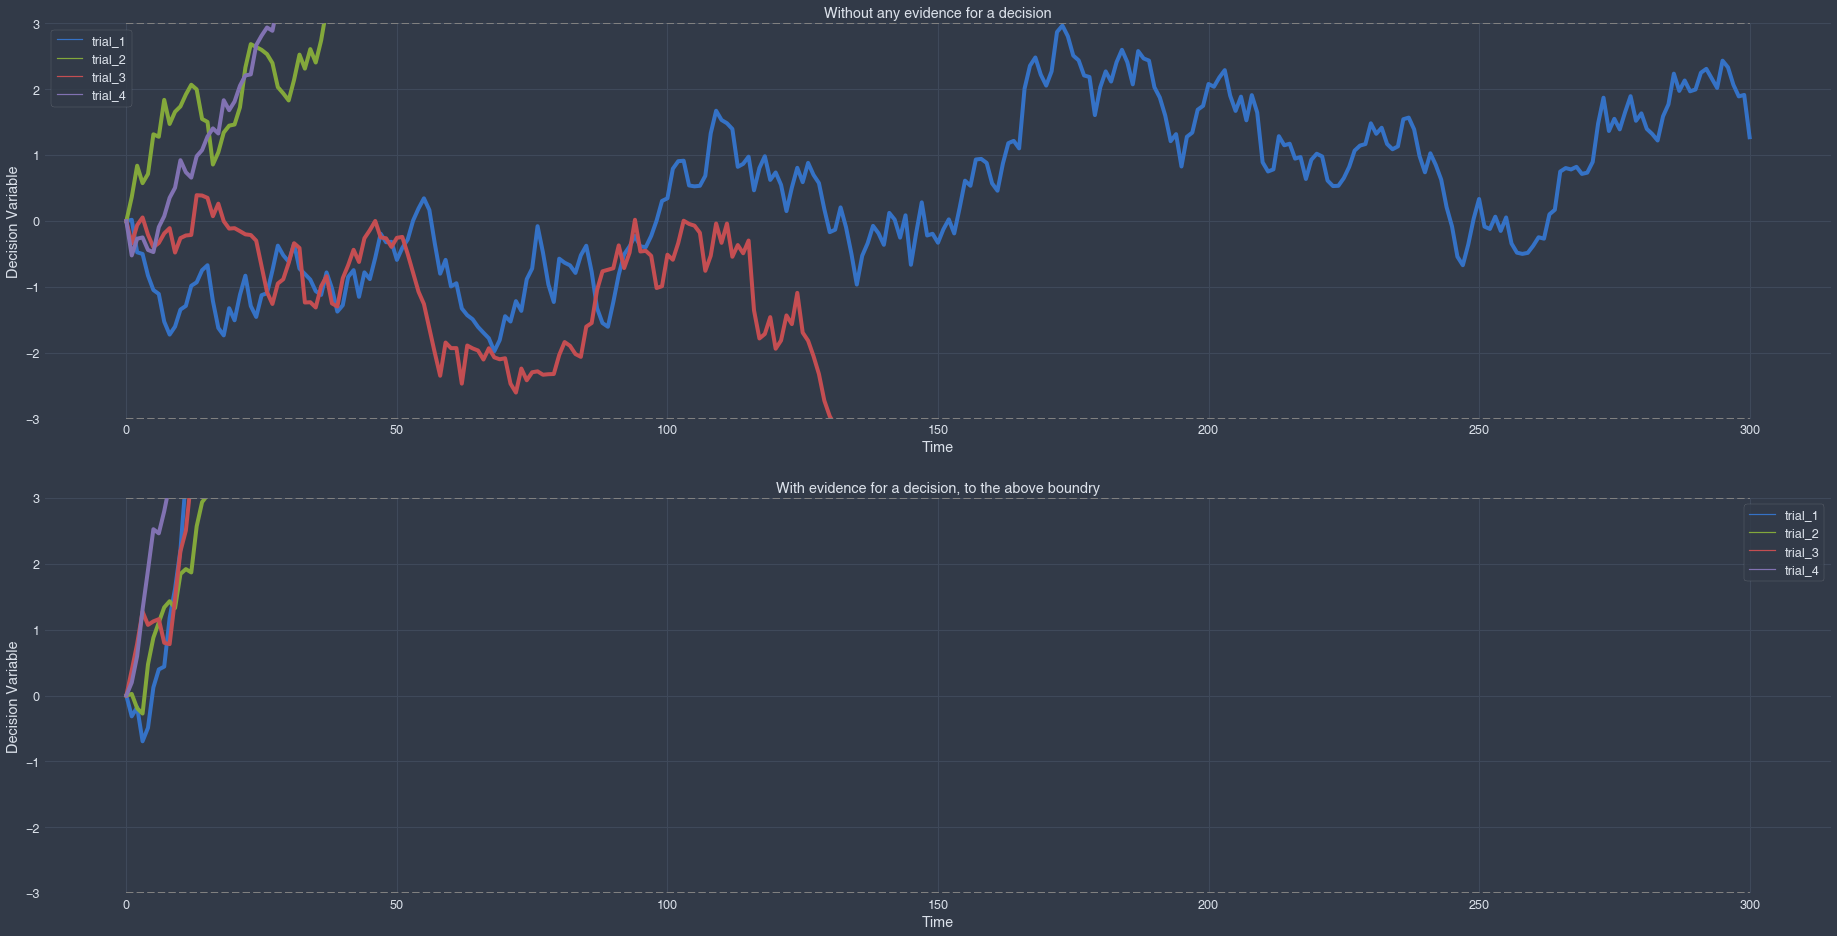

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('chesterish',
             spines=False,
             figsize=(40, 20))

plt.subplot(2, 1, 1)
plt.xlabel('Time')
plt.ylabel('Decision Variable')
plt.title('Without any evidence for a decision')
plt.ylim(-3,3)
sns.lineplot(data=df_dv.iloc[:, 0:4],
             dashes=False,
             linewidth=4);
plt.plot([0, nsamples], [3, 3],
         linestyle='--',
         linewidth=2,
         c='grey');
plt.plot([0, nsamples], [-3, -3],
         linestyle='--',
         linewidth=2,
         c='grey');

plt.subplot(2, 1, 2)
plt.xlabel('Time')
plt.ylabel('Decision Variable')
plt.title('With evidence for a decision, to the above boundry')
plt.ylim(-3,3)
sns.lineplot(data=df_dv_above.iloc[:, 0:4],
             dashes=False,
             linewidth=4);
plt.plot([0, nsamples], [3, 3],
         linestyle='--',
         linewidth=2,
         c='grey');
plt.plot([0, nsamples], [-3, -3],
         linestyle='--',
         linewidth=2,
         c='grey');


<br>

And view the distribution of latencies in a histogram, seperated by choice (high boundry, low boundry):

<br>

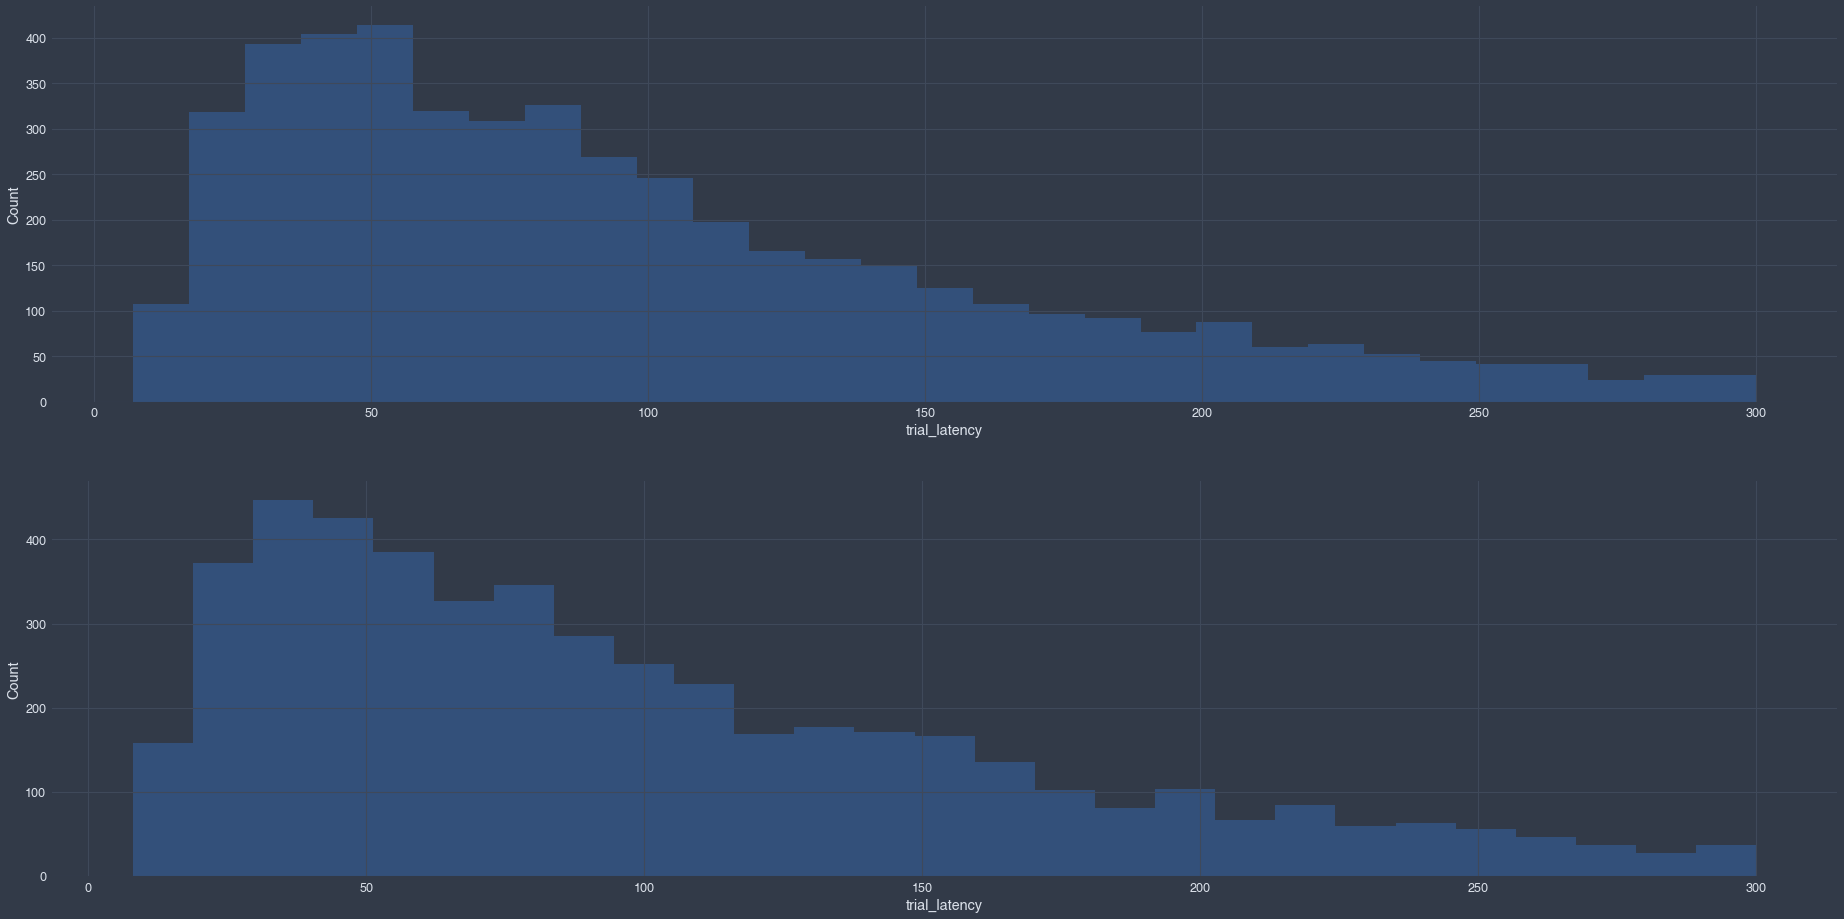

In [12]:
plt.subplot(2, 1, 1)
plt.ylabel('Count')
sns.distplot(df_trials.trial_latency[df_trials.trial_response == 1],  # high boundry
            kde=False);
plt.subplot(2, 1, 2)
plt.ylabel('Count')
sns.distplot(df_trials.trial_latency[df_trials.trial_response == -1],  # low boundry
            kde=False);

<br> 

Next:

See page 30...

<br>

